In [1]:
import os
import pylab as pl
import numpy as np
from casatasks import tclean

In [2]:
os.system('rm -rf try_cube_hogbom.*')
rec = tclean(vis='sim_data_VLA.ms',imagename='try_cube_hogbom',imsize=512,cell='12.0arcsec',
       specmode='cube',interpolation='nearest',nchan=5,start='1.0GHz',width='0.2GHz',
       pblimit=-1e-05,deconvolver='hogbom',niter=10000, gain=0.2, 
             interactive=0,mask='circle[[256pix,256pix],150pix]')
np.save('try_cube_hogbom.summary.npy', rec) 


Summary from the logs for the first 2 channels of this image

<br>[try_cube_hogbom:C0] iters=0->100 [100], model=0->89.7445, peakres=12.3082->2.154, Reached cyclethreshold.
<br>[try_cube_hogbom:C0] iters=0->284 [284], model=89.7445->143.482, peakres=2.154->0.387791, Reached cyclethreshold.
<br>[try_cube_hogbom:C0] iters=0->469 [469], model=143.482->159.264, peakres=0.387762->0.0690344, Reached cyclethreshold.
<br>[try_cube_hogbom:C0] iters=0->2539 [2539], model=159.264->160.157, peakres=0.0690212->0.0122893, Reached cyclethreshold.

<br>[try_cube_hogbom:C1] iters=100->173 [73], model=0->53.9917, peakres=8.12588->2.17957, Reached cyclethreshold.
<br>[try_cube_hogbom:C1] iters=284->630 [346], model=53.9917->119.406, peakres=2.17951->0.384861, Reached cyclethreshold.
<br>[try_cube_hogbom:C1] iters=469->1061 [592], model=119.406->138.461, peakres=0.384846->0.0689213, Reached cyclethreshold.
<br>[try_cube_hogbom:C1] iters=2539->4070 [1531], model=138.461->140.792, peakres=0.0689116->0.0122758, Reached cyclethreshold.




## Extracting the iteration summary information

In [3]:
summ = np.load('try_cube_hogbom.summary.npy',allow_pickle='TRUE').item()
summ_minor = summ['summaryminor'][0] # field 0, not doing multifield imaging
summ_major = summ['summarymajor']

In [4]:
## Print iterDone, startIterDone for channel 0
print(summ_minor[0][0]['iterDone'])
print(summ_minor[0][0]['startIterDone'])

[100.0, 284.0, 468.0, 2563.0]
[0.0, 244.0, 2024.0, 5592.0]


In [5]:
# To obtain a continuous iteration count for channel 0
## Note : This will not include the starting iteration number of zero....
iters = summ_minor[0][0]['iterDone']
cum_iters=[iters[0]]
for i in range(1,len(iters)):
    cum_iters.append( iters[i]+cum_iters[i-1] )
print(cum_iters)

[100.0, 384.0, 852.0, 3415.0]


In [6]:
## Print mod flux for channel 0
print(summ_minor[0][0]['modelFlux'])
print(summ_minor[0][0]['startModelFlux'])

[89.74259948730469, 143.48089599609375, 159.1551971435547, 160.33184814453125]
[0.0, 89.74259948730469, 143.48089599609375, 159.15518188476562]


In [7]:
## Major cycle iteration number.
## The gap between each pair of entries here, represents the sum of minor cycle iterations across all channels.
## It is the same as "startIterDone" for channel 0. 
print(summ_major)

[    0   244  2024  5592 15529]


In [8]:
## Show the cyclethreshold.
## Note : This value is constant across channels, but replicated in the dictionary, for each channel/stokes plane. 
print(summ_minor[0][0]['cycleThresh'])

[2.191934823989868, 0.3881566822528839, 0.06892746686935425, 0.012271924875676632]


## Convergence plot 1 : Values at the end of minor cycle iterations
An overlay of plots across the channel and stokes axes. 

X-axis : Iteration count, starting at zero for each channel/stokes image plane. This is the total number of iterations completed for the channel. 

Y-axis : Peak Residual and Total Model Flux. These values are recorded at the end of each set of minor cycle iterations. 

Plot for channel 0 and stokes 0
Plot for channel 1 and stokes 0
Plot for channel 2 and stokes 0
Plot for channel 3 and stokes 0
Plot for channel 4 and stokes 0


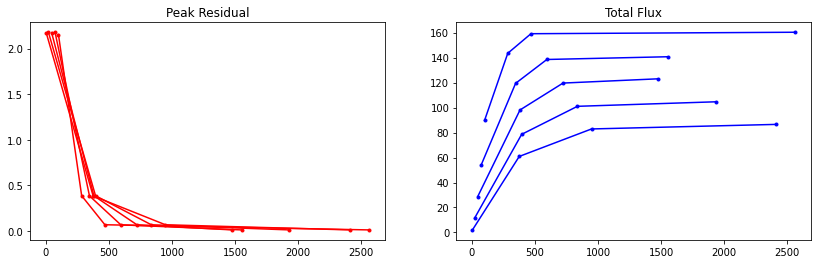

In [9]:
chan=0
pol=0

pl.figure(figsize=(14,4))
pl.clf()
ax1 = pl.subplot(121)
pl.title('Peak Residual')
ax2 = pl.subplot(122)
pl.title('Total Flux')

for chan in summ_minor.keys():
    for stoke in summ_minor[chan].keys():
        print("Plot for channel %d and stokes %d"%(chan,stoke))
        rec1 = summ_minor[chan][stoke]
        
        iters=rec1['iterDone']
        cum_iters=[iters[0]]
        for i in range(1,len(iters)):
            cum_iters.append( iters[i]+cum_iters[i-1] )

        peakres = rec1['peakRes']
        modflux = rec1['modelFlux']
        ax1.plot(iters, peakres,'r.-')
        ax2.plot(iters, modflux,'b.-')

The dots represent major cycle boundaries, per channel.

Note that the first set of points represent the values at the end of the first set of minor cycle iterations and the initial values are not displayed. So, if an initial startmode is supplied, it will not be reflected here. Further, this plot will not show the situation of the peak residual (say) stepping up across a major cycle boundary; something that can occur with over-fitting in the minor cycles. 

## Convergence Plot 2 : Values at the start and end of minor cycle iteration sets
The following is an example to create plots with both start and end values shown per minor-cycle set

Plot for channel 0 and stokes 0
Plot for channel 1 and stokes 0
Plot for channel 2 and stokes 0
Plot for channel 3 and stokes 0
Plot for channel 4 and stokes 0


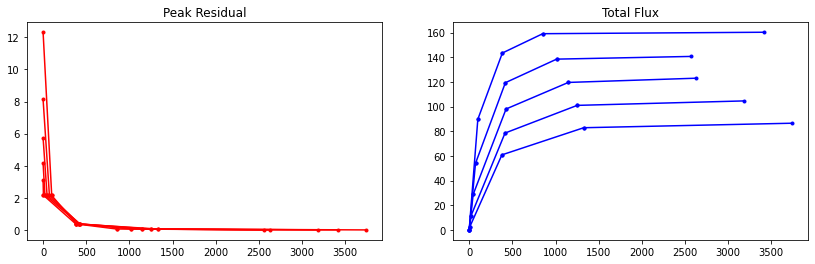

In [10]:
chan=0
pol=0

pl.figure(figsize=(14,4))
pl.clf()
ax1 = pl.subplot(121)
pl.title('Peak Residual')
ax2 = pl.subplot(122)
pl.title('Total Flux')

for chan in summ_minor.keys():
    for stoke in summ_minor[chan].keys():
        print("Plot for channel %d and stokes %d"%(chan,stoke))
        rec1 = summ_minor[chan][stoke]
        
        ## Set the first element to the start
        iters=[] #rec1['startIterDone'][0]]
        peakres=[] #[rec1['startPeakRes'][0]]
        modflux=[] #[rec1['startModFlux'][0]]
        
        start_iter=0
        for i in range(len(rec1['iterDone'])):  ## Number of sets of minor cycles
            iters.append(start_iter)          # itercount at start
            iters.append(start_iter + rec1['iterDone'][i])   # itercount at end
            start_iter = start_iter + rec1['iterDone'][i]  # Update the starting point....
            peakres.append(rec1['startPeakRes'][i])  # peakres at start
            peakres.append(rec1['peakRes'][i])          # peakres at end
            modflux.append(rec1['startModelFlux'][i])  # flux at start
            modflux.append(rec1['modelFlux'][i])          # flux at end
            
        ax1.plot(iters, peakres,'r.-')
        ax2.plot(iters, modflux,'b.-')

In this plot, both the start and end values are displayed. In an ideal run, the value of at the end of a set of minor cycle iterations will be nearly identical to the value at the start of the next set of minor cycle iterations (i.e. no change across a major-cycle boundary).

If there is a jump in peak residual across the major cycle boundary, it will appear as a vertical line where there is currently a dot. 

The starting model total flux is also displayed now (in this case, it starts at zero). 

The iteration count is still independent per channel. This address the use case of needing to compare channels against each other as it is clear exactly how many iterations have been done. 


## Convergence plot 4 : Peak Res and Model Flux at major cycle boundaries
A plot where the major cycle boundary is synchronized across all channels. The iteration count from one major cycle to the next represents the sum of minor cycle iterations across all channels. 

This example is nearly identical to example 3 above, and differs only in its use of the major cycle iteration count on the x-axis, and the inclusion of 'cycleThreshold' in the plot. 

Plot for channel 0 and stokes 0
Plot for channel 1 and stokes 0
Plot for channel 2 and stokes 0
Plot for channel 3 and stokes 0
Plot for channel 4 and stokes 0


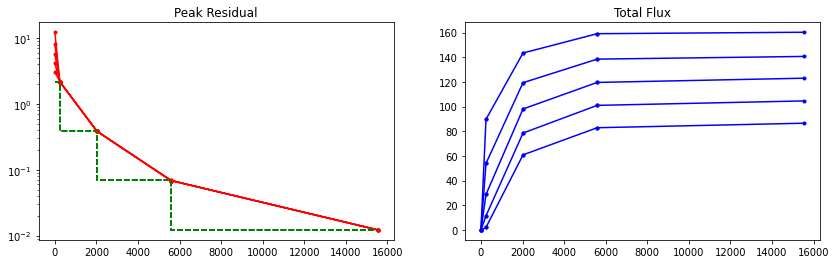

In [11]:
chan=0
pol=0

pl.figure(figsize=(14,4))
pl.clf()
ax1 = pl.subplot(121)
pl.title('Peak Residual')
ax2 = pl.subplot(122)
pl.title('Total Flux')

for chan in summ_minor.keys():
    for stoke in summ_minor[chan].keys():
        print("Plot for channel %d and stokes %d"%(chan,stoke))
        rec1 = summ_minor[chan][stoke]
        
        ## Set the first element to the start
        iters=[] 
        peakres=[] 
        modflux=[] 
        cycthresh=[]
        
        start_iter=0
        for i in range(len(rec1['iterDone'])):  ## Number of sets of minor cycles
            iters.append(start_iter)          # itercount at start
            iters.append(summ_major[i+1])     # itercount at end
            start_iter = summ_major[i+1]  # Update the starting point....
            peakres.append(rec1['startPeakRes'][i])  # peakres at start
            peakres.append(rec1['peakRes'][i])          # peakres at end
            modflux.append(rec1['startModelFlux'][i])  # flux at start
            modflux.append(rec1['modelFlux'][i])          # flux at end
            cycthresh.append(rec1['cycleThresh'][i])    # cyclethreshold for this set of iters
            cycthresh.append(rec1['cycleThresh'][i])    # cyclethreshold for this set of iters
            
        ax1.semilogy(iters, peakres,'r.-')
        ax1.semilogy(iters,cycthresh, 'g--')

        ax2.plot(iters, modflux,'b.-')


Plots for all channels are synchronized at major-cycle boundaries. With this kind of plot, one can check/see the effect of the cyclethreshold parameter as it is the same value for all channels.


## Convergence plot 5 : True iteration count on the x axis.....

Plot for channel 0 and stokes 0
Plot for channel 1 and stokes 0
Plot for channel 2 and stokes 0
Plot for channel 3 and stokes 0
Plot for channel 4 and stokes 0


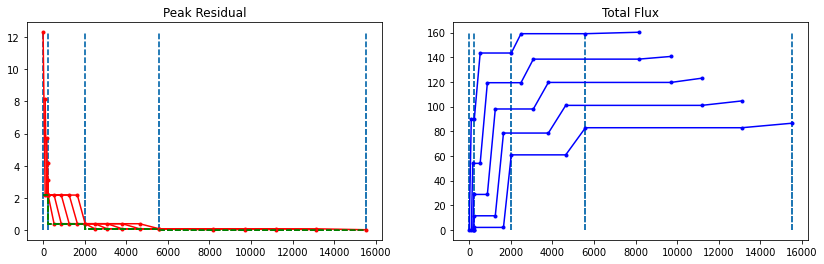

In [12]:
chan=0
pol=0

pl.figure(figsize=(14,4))
pl.clf()
ax1 = pl.subplot(121)
pl.title('Peak Residual')
ax2 = pl.subplot(122)
pl.title('Total Flux')

for chan in summ_minor.keys():
    for stoke in summ_minor[chan].keys():
        print("Plot for channel %d and stokes %d"%(chan,stoke))
        rec1 = summ_minor[chan][stoke]
        
        ## Set the first element to the start
        iters=[] 
        peakres=[] 
        modflux=[] 
        
        for i in range(len(rec1['iterDone'])):  ## Number of sets of minor cycles
            iters.append(rec1['startIterDone'][i])          # itercount at start
            iters.append(rec1['startIterDone'][i] + rec1['iterDone'][i] )     # itercount at end
            peakres.append(rec1['startPeakRes'][i])  # peakres at start
            peakres.append(rec1['peakRes'][i])          # peakres at end
            modflux.append(rec1['startModelFlux'][i])  # flux at start
            modflux.append(rec1['modelFlux'][i])          # flux at end
            
            
        maj_iter=[]
        cycthresh=[]
        start_iter=0
        for i in range(len(rec1['iterDone'])):  ## Number of sets of minor cycles
            maj_iter.append(start_iter)          # itercount at start
            maj_iter.append(summ_major[i+1])     # itercount at end
            start_iter = summ_major[i+1]  # Update the starting point....
            cycthresh.append(rec1['cycleThresh'][i])    # cyclethreshold for this set of iters
            cycthresh.append(rec1['cycleThresh'][i])    # cyclethreshold for this set of iters
            
            
        ax1.plot(iters, peakres,'r.-')
        ax2.plot(iters, modflux,'b.-')

        #Vertical lines for major cycle boundaries
        for it in summ_major:
            ax1.vlines(x=[it,it], ymin=0, ymax=np.max(peakres),linestyles='dashed')
            ax2.vlines(x=[it,it], ymin=0, ymax=np.max(modflux),linestyles='dashed')

        # Cyclethreshold that changes only at major cycle boundaries
        ax1.plot(maj_iter, cycthresh,'g--')
        

## Spectra of the Peak Residual and Model Flux
Plots of the spectra of peak residual and model flux, with overlays from multiple major cycle iterations. 

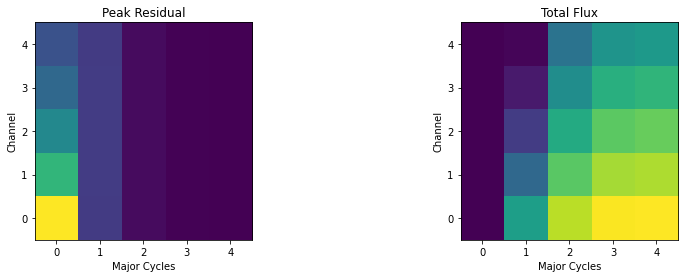

In [13]:
chan=0
pol=0

fig=pl.figure(figsize=(14,4))
pl.clf()
ax1 = pl.subplot(121)
pl.title('Peak Residual')
ax2 = pl.subplot(122)
pl.title('Total Flux')

mat_res=pl.zeros((len(summ_minor.keys()),(len(summ_minor[0][0]['iterDone'])+1)))  ## Shape : nchan x nmajor+1
mat_flux=pl.zeros((len(summ_minor.keys()),(len(summ_minor[0][0]['iterDone'])+1)))  ## Shape : nchan x nmajor+1

# Plot for the first stokes plane onyly
for chan in summ_minor.keys():

    mat_res[chan,0] = summ_minor[chan][0]['startPeakRes'][0]
    mat_flux[chan,0] = summ_minor[chan][0]['startModelFlux'][0]

    mat_res[chan,1:] = summ_minor[chan][0]['peakRes']
    mat_flux[chan,1:] = summ_minor[chan][0]['modelFlux']
        
ax1.imshow(mat_res,origin='lower')
ax1.set_xlabel('Major Cycles');
ax1.set_ylabel('Channel');

ax2.imshow(mat_flux,origin='lower')
ax2.set_xlabel('Major Cycles');
ax2.set_ylabel('Channel');


In this example, the Peak Residual raster shows that the initial peak residual is different for all channels, but that after the first set of minor cycle iterations, the peak is the same across channels. This is because all channels stopped on 'cyclethreshold', and then consistently reduced in subsequent iterations. 

The Total Flux raster shows that the initial (start) model was zero for all channels, and that the flux built up over time, with the first channel being the brightest. 

Note that this example has extended emission, and the 'peak res' is the value of the brightest pixel, whereas the model flux represents the sum across all image pixels within the deconvolution mask. 

The 2D matrix assembled for this example may be used to generate line plots of spectra, per major cycle, if needed. 

## More examples....

The example below shows results from the demo script plotscript_simple_jan2022.py from B.Bean, attached to CAS-6692. These graphs align the minor cycle starts to the major cycles.

Information that **is in** these graphs is:
* per-channel convergence
* changes in peak residual or flux due to the major cycle
* iterations required per channel within each major cycle

Information that **is not in** these graphs (but is captured in other graphs) is:
* order of channel processing (convergence plot 5)

Finally, these graphs are useful for a small number of channels. For a large number of channels, either decimation of channels presented is necessary, or a graph like the Spectra Graphs (above) would work better.

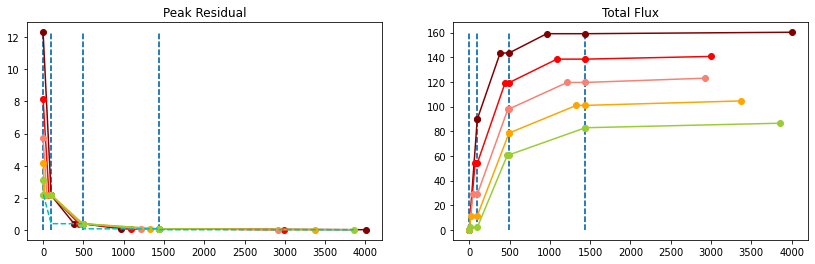

In [20]:
def flatzip(lista, listb):
    """flatzip([0,2,4],[1,3,5]) => [0,1,2,3,4,5]"""
    ret = []
    for pair in zip(lista,listb):
        ret += list(pair)
    return ret

# Channel IDs. Indexing may get messy with both dimensions turned on, but for stokes='I', this works.
chan_ids = list(summ_minor.keys())
ncycles  = len(summ_minor[0][0]['iterDone'])

# A list of iteration numbers at which major cycles happened.
# Redefine the number of minor cycle iterations done between each major cycle as the largest iterDone
# for a single channel for that major cycle. For example, if the first two channels have iterDone:
#     c0: [100.0, 284.0, 468.0, 2563.0]
#     c1: [73.0,  346.0, 594.0, 1552.0]
# Then this will produce:
#     mc: [100.0, 346.0, 594.0, 2563.0]
majcycle = [0]
for majcycle_idx in range(ncycles-1):
    iters_done_perchan = [summ_minor[chan_id][0]['iterDone'][majcycle_idx] for chan_id in chan_ids]
    majcycle.append(majcycle[-1] + max(iters_done_perchan))

colors = ['maroon','red','salmon','orange','yellowgreen','green','darkgreen','skyblue','blue','indigo']
fig=pl.figure(figsize=(14,4))
pl.clf()
ax1 = pl.subplot(121)
pl.title('Peak Residual')
ax2 = pl.subplot(122)
pl.title('Total Flux')
all_fluxes, all_peaks = [], []

#Channel peak residual/flux graphs
for chan_idx in range(len(chan_ids)):
    chan_id = chan_ids[chan_idx]
    color   = colors[chan_idx%len(colors)]
    iters_done    = np.array( summ_minor[chan_id][0]['iterDone'] )
    maj_then_iter = flatzip( majcycle, (iters_done + majcycle).tolist() ) # [maj0, maj0+iter0, maj1, maj1+iter1, ...]
    sel_fluxes    = flatzip( summ_minor[chan_id][0]['startModelFlux'], summ_minor[chan_id][0]['modelFlux']   )
    sel_peaks     = flatzip( summ_minor[chan_id][0]['startPeakRes'],   summ_minor[chan_id][0]['peakRes']     )
    all_fluxes   += sel_fluxes
    all_peaks    += sel_peaks

    ax1.plot(maj_then_iter, sel_peaks,  'o-', color=color)
    ax2.plot(maj_then_iter, sel_fluxes, 'o-', color=color)
    
#Horizontal lines for cycle thresholds
sel_cycthresh = flatzip( summ_minor[0][0]['cycleThresh'],    summ_minor[0][0]['cycleThresh'] )
ax1.plot(maj_then_iter, sel_cycthresh, 'c--')
    
#Vertical lines for major cycle boundaries
for it in majcycle:
    ax1.vlines(x=[it,it], ymin=0, ymax=np.max(all_peaks),  linestyles='dashed')
    ax2.vlines(x=[it,it], ymin=0, ymax=np.max(all_fluxes), linestyles='dashed')
